In [66]:
#loading dataset
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [67]:
train_labels[0]

1

In [68]:
max([max(sequence) for sequence in train_data])

9999

In [69]:
#encoded text->text
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_review=" ".join([reverse_word_index.get(i-3,"?") for i in train_data[0]])

In [71]:
decoded_review=" ".join([reverse_word_index.get(i-3,"?") for i in train_data[3]])
print(decoded_review)

? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our prota

In [74]:
#vectorizing test ,training data and labels
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]=1.
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

In [75]:
print(x_train[0])
print(x_test[0])
print(y_train[0])
print(y_test[0])

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
1.0
0.0


In [76]:
#model building
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [77]:
#splitting data for validation
x_val=x_train[:10000]
p_x_train=x_train[10000:]
y_val=y_train[:10000]
p_y_train=y_train[10000:]
history=model.fit(p_x_train,p_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.5064 - accuracy: 0.7878 - val_loss: 0.3891 - val_accuracy: 0.8683
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3006 - accuracy: 0.9093 - val_loss: 0.3063 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2207 - accuracy: 0.9321 - val_loss: 0.2905 - val_accuracy: 0.8855
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1773 - accuracy: 0.9418 - val_loss: 0.2907 - val_accuracy: 0.8839
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1431 - accuracy: 0.9541 - val_loss: 0.2974 - val_accuracy: 0.8829
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1169 - accuracy: 0.9648 - val_loss: 0.2928 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1000 - accuracy: 0.9711 - val_loss: 0.3416 - val_accuracy: 0.8756
Epoch 8/20
30

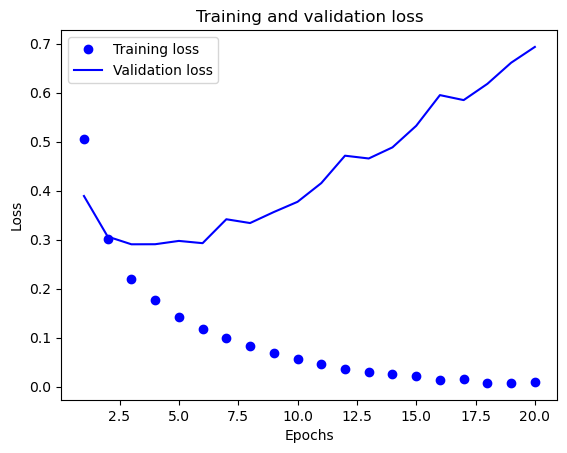

In [78]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

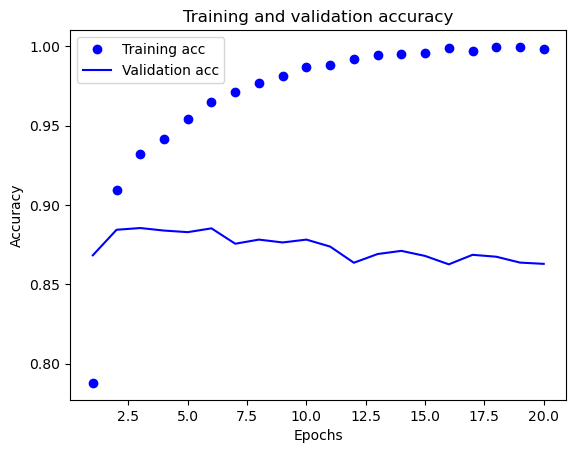

In [79]:
plt.clf()                      
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [112]:
#retraining to prevent overfitting with 4 epochs
model=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 16ms/step - loss: 0.4647 - accuracy: 0.8206
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2681 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2050 - accuracy: 0.9279
Epoch 4/4
782/782 [==============================] - 4s 5ms/step - loss: 0.3002 - accuracy: 0.8790


In [113]:
results

[0.30015829205513, 0.879040002822876]

In [114]:
model.predict(x_test)

782/782 [==============================] - 3s 4ms/step


array([[0.2566932 ],
       [0.9987131 ],
       [0.9506467 ],
       ...,
       [0.19904664],
       [0.11299808],
       [0.73335195]], dtype=float32)